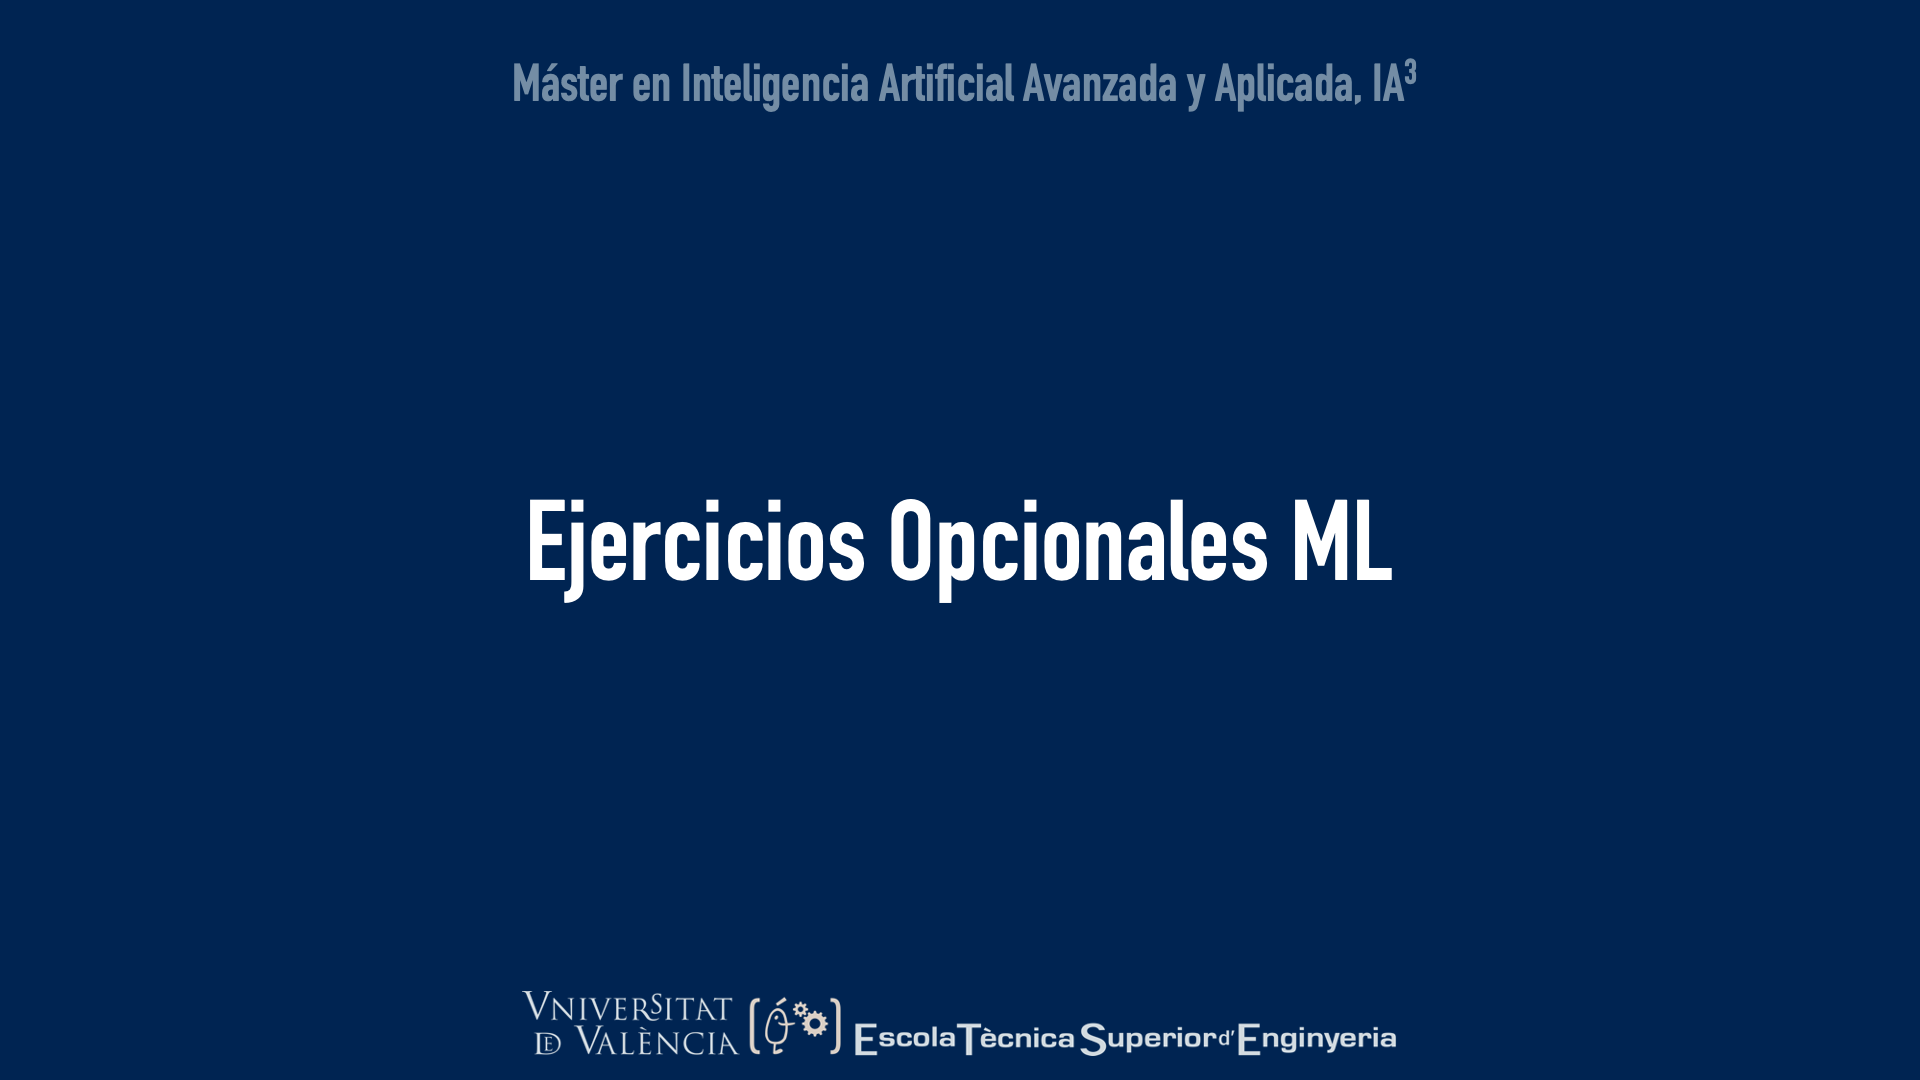

# AI3 Team:

* Máximo Megías
* José Murillo
* Lluís Navarro-Girbés


# Exercise 01 - 1 Point:

For this exercise I propose you to draw a flow diagram on how to learn on how to use an algorithm, train and evaluate it.

As we learnt in the class this process should contain a block on understanding how this algorithm learn, a block on how to train it including hyperparameters and one block on how you will evaluate and iterate to tune the hyperparameters.

The idea behind this exercise is that visualizing these ideas it will help you create your own framework to work in ML.

Just draw the diagram using diagram.io and upload it to the notebook.

# Exercise 02 - 2 Points:

Now that you have your own framework to work using ML, I propose you to solve the same classification exercise of the pinguins dataset using one of the follow algorithms:

Logistic Regressions - https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148#:~:text=Logistic%20Regression%20is%20a%20Machine,on%20the%20concept%20of%20probability.&text=The%20hypothesis%20of%20logistic%20regression,function%20between%200%20and%201%20.
Naive Bayes - https://towardsdatascience.com/naive-bayes-classifier-explained-50f9723571ed#:~:text=Naive%20Bayes%20is%20a%20supervised,prediction%20on%20a%20target%20variable.
Support Vector Machines (This one is specially difficult to understand and use) - https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989#:~:text=SVM%20or%20Support%20Vector%20Machine,separates%20the%20data%20into%20classes.
Please choose one of the previous algorithms, do the classification exercise and include a small summary of how the algorithm performs against the decission tree and which hyperparameters you should to tune and why.

In [2]:
seed = 12
import seaborn as sns
dataset = sns.load_dataset("penguins")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Overview

**The columns in this dataset are:**

1.  species: penguin species (categorical)
2.  island: penguin habitat island (categorical)
3.  bill_length_mm: bill length (mm) (the beak length)
4.  bill_depth_mm: bill depth (mm)
5.  flipper_length_mm: flipper length (mm) (the special wings of penguins)
6.  body_mass_g : the weight (g)
7.  sex: gender (categorical, target)


## 1 Further Library Imports 

In [3]:
# Loading required Python libs

# Basic Low-Level Numerical & Data Manipulation Libraries
import pandas as pd
import numpy as np

# Data Visualizations 
sns.set(style="whitegrid", font_scale=1.2)
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

## For ML Preprocessing, Features Extraction, Model Fitting & Selection and Validation Metrics
from sklearn.preprocessing import RobustScaler
# Splitting, Features Extraction and Training
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, auc
# Tunning Hyperparameters
from sklearn.model_selection import GridSearchCV

## 2 Some Visualizations and Correlation Analysis with Numeric Variables




In [4]:
dataset.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [5]:
dataset.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### 2.1 The Categorical Variables
Obviously `sex` a is binary variable. And the rest?

In [6]:
print(f"Penguin Species: {dataset['species'].unique().tolist()}")
print(f"Penguin Islands: {dataset['island'].unique().tolist()}")

Penguin Species: ['Adelie', 'Chinstrap', 'Gentoo']
Penguin Islands: ['Torgersen', 'Biscoe', 'Dream']


### Checking for Null Variables and dropping out them

In [7]:
dataset.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [8]:
dataset.dropna(inplace=True)


#### Are Categorical Variables important For Sex Classifying?


In [9]:
pd.crosstab(index=dataset['sex'], columns=[dataset['species'],dataset['island']])

species Adelie                 Chinstrap Gentoo
island  Biscoe Dream Torgersen     Dream Biscoe
sex                                            
Female      22    27        24        34     58
Male        22    28        23        34     61

Intuitively not, but graphically what we see is that points are nearly separable combined with other numerical variable like, for instance, `bill_depth_mm` and `bill_length_mm`



In [264]:
fig = px.scatter(dataset, x="bill_depth_mm", y="species" , color="sex")
fig.show()

In [265]:
fig = px.scatter_3d(dataset, x='bill_length_mm', y='bill_depth_mm', z='species',
              color='sex')
fig.show()

### 2.2 Analyzing the Effects of a Scaler

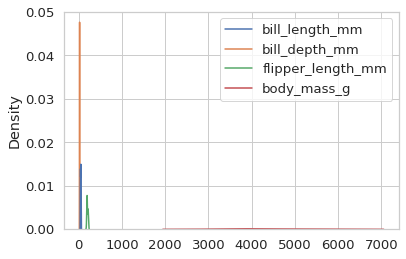

In [266]:
# Ojo los Features numéricos son un drama -> escalas muy disintas
X = dataset.select_dtypes('number')
X.head()
sns.kdeplot(data = X)
plt.show()

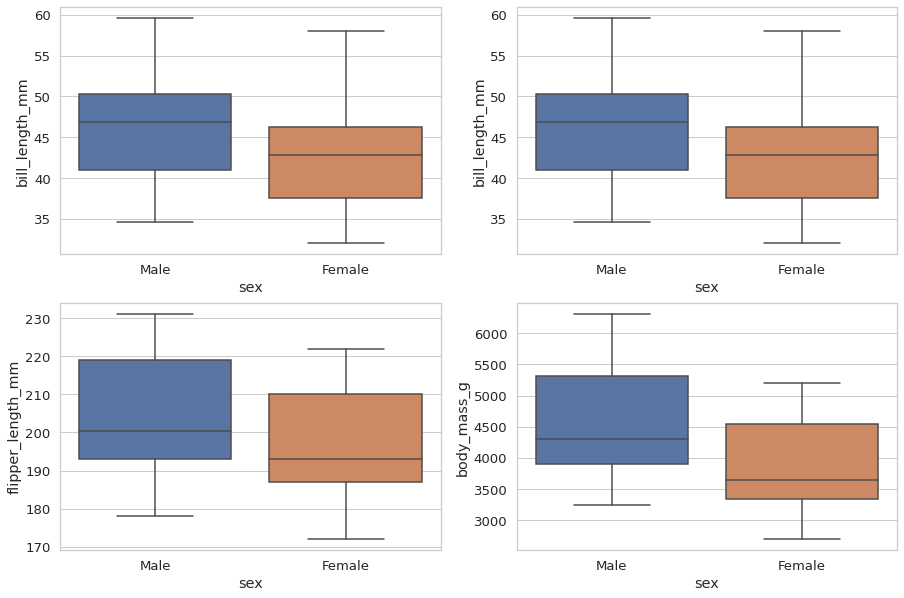

In [267]:
plt.subplots(figsize = (15,10))
plt.subplot(2,2,1)
sns.boxplot(x='sex', y='bill_length_mm', data=dataset)
plt.subplot(2,2,2)
sns.boxplot(x='sex', y='bill_length_mm', data=dataset)
plt.subplot(2,2,3)
sns.boxplot(x='sex', y='flipper_length_mm', data=dataset)
plt.subplot(2,2,4)
sns.boxplot(x='sex', y='body_mass_g', data=dataset)
plt.show()

_Features_ are very different in scale. Thus, we test the benefits with RobustScale

In [268]:
X = dataset.iloc[:, :-1]
X_dummies = pd.get_dummies(X)
Y = dataset.loc[:,['sex']]

In [269]:
print(f"# Penguins")
print(f"Adelie: {X_dummies.species_Adelie.sum()}")
print(f"Gentoo: {X_dummies.species_Gentoo.sum()}")
print(f"Chinstrap: {X_dummies.species_Chinstrap.sum()}")

# Penguins
Adelie: 146
Gentoo: 119
Chinstrap: 68


In [270]:
robust_scaler = RobustScaler()
X_robust = robust_scaler.fit_transform(X_dummies)

In [271]:
# Scaling does not affect dummies: a check
X_robust = pd.DataFrame(X_robust, columns=X_dummies.columns)
print(f"# Penguins")
print(f"Adelie: {X_robust.species_Adelie.sum()}")
print(f"Gentoo: {X_robust.species_Gentoo.sum()}")
print(f"Chinstrap: {X_robust.species_Chinstrap.sum()}")


# Penguins
Adelie: 146.0
Gentoo: 119.0
Chinstrap: 68.0


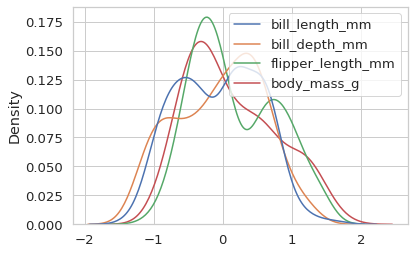

In [272]:
# And For Numerical Variables: we have all on a similar scale
sns.kdeplot( data= X_robust.iloc[:,:4])
plt.show()

## 3 Modelling



In [273]:
# Clear workspace
del X, X_dummies, X_robust

In [274]:
# Separating the response (y) and Explanatory Variables. We also made a One-Hot-Encoding of the Categorical Variables and the Scaling. 
# Note that we just fit the Training Set for the Scaler as we are resetting the 'X' utilised above
# for descriptive analysis and we are restarting from a unscaled and a decoded state.
X = dataset.iloc[:, :-1]
X_dummies = pd.get_dummies(X)
Y = dataset.loc[:,['sex']]
X_dummies.head(10)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1
5,39.3,20.6,190.0,3650.0,1,0,0,0,0,1
6,38.9,17.8,181.0,3625.0,1,0,0,0,0,1
7,39.2,19.6,195.0,4675.0,1,0,0,0,0,1
12,41.1,17.6,182.0,3200.0,1,0,0,0,0,1
13,38.6,21.2,191.0,3800.0,1,0,0,0,0,1
14,34.6,21.1,198.0,4400.0,1,0,0,0,0,1


### 3.1 Feature Elimination with Cross-Validation
Create the RFE object and compute a cross-validated score.

In [275]:
# It is just a qualitative approach in order to choose the # of important features.
# Thus we does not split into two sets yet:
rbsc = RobustScaler()
X_scaled = rbsc.fit_transform(X_dummies)
LogReg = LogisticRegression(C=1)
rfecv = RFECV(estimator=LogReg, step=1, cv=StratifiedKFold(5, shuffle=True, random_state=seed), scoring='accuracy')
rfecv.fit(X_scaled,Y.values.ravel())

RFECV(cv=StratifiedKFold(n_splits=5, random_state=12, shuffle=True),
      estimator=LogisticRegression(C=1, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='auto', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='lbfgs', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [276]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 4


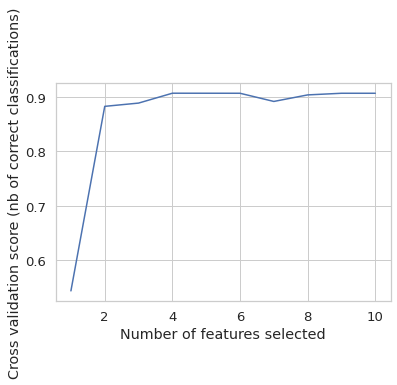

In [277]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

### 3.2 Identifying Important Features

In [278]:
print(f"Cross-Validated Recursive Feature Extraction:\n")
print(f"Ranking of Importance: {rfecv.ranking_}")

Cross-Validated Recursive Feature Extraction:

Ranking of Importance: [1 1 4 1 1 2 3 7 5 6]


In [279]:
print(f"The Most Important Features: {X_dummies.columns[rfecv.support_].tolist()}")

The Most Important Features: ['bill_length_mm', 'bill_depth_mm', 'body_mass_g', 'species_Adelie']


#### A Double Check Using Splitting and `RFE`

In [280]:
# Resetting Features
X = dataset.iloc[:, :-1]
X_dummies = pd.get_dummies(X)
# Splitting
X_train, X_test, Y_train, Y_test = train_test_split(X_dummies, Y, test_size= 0.25)
X_train = rbsc.fit_transform(X_train)
# Two Most Important Features To Extract
rfe = RFE(LogReg, n_features_to_select=4)
rfe = rfe.fit(X_train, Y_train.values.ravel() )

In [281]:
col_important_names = X_dummies.columns[rfe.support_].tolist()
print(f"Important Features: {col_important_names}")

Important Features: ['bill_length_mm', 'bill_depth_mm', 'body_mass_g', 'species_Adelie']


### 3.3 Testing Final Candidate Models with the Most Important Features

In [282]:
# Resetting Features
X = dataset.iloc[:, :-1]
X_dummies = pd.get_dummies(X)
# Extracting The Important Features
X = X_dummies[col_important_names]
# Splitting And Scaling again
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.25, random_state=seed)
X_train = rbsc.fit_transform(X_train)
X_test = rbsc.transform(X_test)

In [283]:
# Checking Balance
print(f"# Male Penguins: {(Y_test=='Male').sum()}")
print(f"# Female Penguins: {(Y_test=='Female').sum()}")
print(f"# Total Test Penguins: {Y_test.count()}")

# Male Penguins: sex    41
dtype: int64
# Female Penguins: sex    43
dtype: int64
# Total Test Penguins: sex    84
dtype: int64


#### 3.3.1 Logistic Regression

In [284]:
# 1. Logistic Regression : We maintain previous model hyperparameters specificaction
LogReg.fit(X_train, Y_train.values.ravel())
sc1 = LogReg.score(X_test, Y_test)
print(sc1)

0.9404761904761905


In [285]:
LogReg.intercept_, LogReg.coef_

(array([-0.89143831]),
 array([[1.97530585, 3.04297672, 3.28970471, 2.01370887]]))

[[0.93181818 0.05      ]
 [0.06818182 0.95      ]]


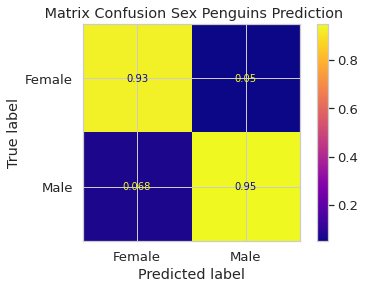

In [286]:
#Make the prediction
y_pred = LogReg.predict(X_test)

disp = plot_confusion_matrix(LogReg, X_test, Y_test,
                                 display_labels=np.unique(Y_test),
                                 cmap='plasma',
                                 normalize='pred')
disp.ax_.set_title(" Matrix Confusion Sex Penguins Prediction")
print(disp.confusion_matrix)

In [287]:
# from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

      Female       0.93      0.95      0.94        43
        Male       0.95      0.93      0.94        41

    accuracy                           0.94        84
   macro avg       0.94      0.94      0.94        84
weighted avg       0.94      0.94      0.94        84



Binary Order Classes ['Female' 'Male']


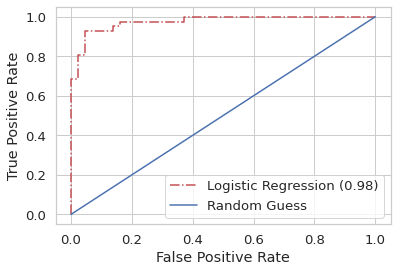

In [288]:
print(f"Binary Order Classes {LogReg.classes_}")
# ROC Curve and Area Under The Curve (AUC)
Y_test_onehot = Y_test.copy()
Y_test_onehot.replace({'sex': {'Female': 0, 'Male': 1}}, inplace=True)

fpr, tpr, thresholds = roc_curve(Y_test_onehot, list(LogReg.predict_proba(X_test)[:,1]), drop_intermediate=False)
fig, ax1 = plt.subplots(1,1)
ax1.plot(fpr, tpr, 'r-.', label = 'Logistic Regression (%2.2f)' % auc(fpr, tpr))
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.plot(fpr, fpr, 'b-', label = 'Random Guess')
ax1.legend();
fig.show()

In [289]:
# Summaryzing (we recall that this is a well-balanced problem, so score may bre appropriate)
print(f"Average Accuracy:\n")
print(f"=================\n")
print(f"Score on Training Set {100*LogReg.score(X_train, Y_train)}%")
print(f"Score on Test Set {100*LogReg.score(X_test, Y_test)}%")
print()
print(f"AUC for the Logistic Regression based Classifier: {auc(fpr,tpr)}")

Average Accuracy:


Score on Training Set 91.96787148594377%
Score on Test Set 94.04761904761905%

AUC for the Logistic Regression based Classifier: 0.9750425411230856


#### 3.3.2 Support Vector Machine with a Linear Kernel

In [290]:
svc = SVC(kernel = 'linear', random_state = 12, probability=True)
svc.fit(X_train,Y_train.values.ravel())
sc2 = svc.score(X_test,Y_test.values.ravel())
print(sc2)
# Very Similar to LogReg.

0.9404761904761905


[[0.93181818 0.05      ]
 [0.06818182 0.95      ]]


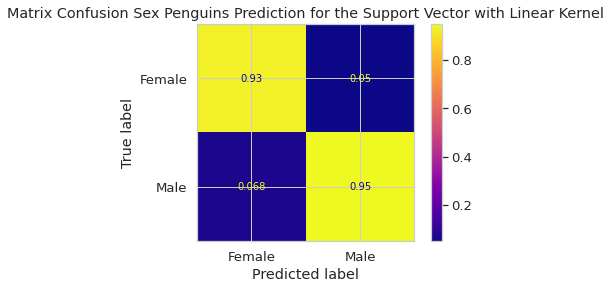

In [291]:
#Goodness-of-fit Metrics
y_pred = svc.predict(X_test)
disp = plot_confusion_matrix(svc, X_test, Y_test,
                                 display_labels=np.unique(Y_test),
                                 cmap='plasma',
                                 normalize='pred')
disp.ax_.set_title("Matrix Confusion Sex Penguins Prediction for the Support Vector with Linear Kernel")
print(disp.confusion_matrix)

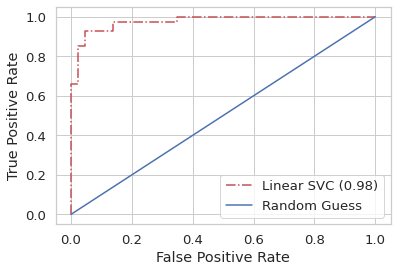

In [292]:
fpr, tpr, thresholds = roc_curve(Y_test_onehot, list(svc.predict_proba(X_test)[:,1]), drop_intermediate=False)
fig, ax1 = plt.subplots(1,1)
ax1.plot(fpr, tpr, 'r-.', label = 'Linear SVC (%2.2f)' % auc(fpr, tpr))
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.plot(fpr, fpr, 'b-', label = 'Random Guess')
ax1.legend();
fig.show()

In [293]:
print(f"Average Accuracy:\n")
print(f"=================\n")
print(f"Score on Training Set {100*svc.score(X_train, Y_train)}%")
print(f"Score on Test Set {100*svc.score(X_test, Y_test)}%")
print()
print(f"AUC for the Support Vector Classifier: {auc(fpr,tpr)}\n")

Average Accuracy:


Score on Training Set 92.7710843373494%
Score on Test Set 94.04761904761905%

AUC for the Support Vector Classifier: 0.9767441860465116



* _Support Vector Machine_ for classification, _SVC_ for short, with a linear kernel have a slighty better behaviour as compared with the _Logistic Regression_ in terms of its score on the Training Set.

* Although the _score_ on the Test Set is identical, the _AUC_ is marginally better for the Linear Support Vector Machine.

Thus, let's check out if a better kernel is possible before tuning the hyperparameters.


In [294]:
kernels = ['Polynomial', 'RBF', 'Sigmoid']
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial
        return SVC(kernel='poly', degree=8, gamma="auto", random_state=seed)
    elif ktype == 1:
        # Radial Basis Function
        return SVC(kernel='rbf', gamma="auto", random_state=seed)
    elif ktype == 2:
        # Sigmoid
        return SVC(kernel='sigmoid', gamma="auto", random_state=seed)

for i in range(3):
    svclassifier = getClassifier(i) 
    svclassifier.fit(X_train, Y_train.values.ravel())# Make prediction
    y_pred = svclassifier.predict(X_test)# Evaluate our model
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(Y_test,y_pred))

Evaluation: Polynomial kernel
              precision    recall  f1-score   support

      Female       0.61      1.00      0.75        43
        Male       1.00      0.32      0.48        41

    accuracy                           0.67        84
   macro avg       0.80      0.66      0.62        84
weighted avg       0.80      0.67      0.62        84

Evaluation: RBF kernel
              precision    recall  f1-score   support

      Female       0.91      0.95      0.93        43
        Male       0.95      0.90      0.92        41

    accuracy                           0.93        84
   macro avg       0.93      0.93      0.93        84
weighted avg       0.93      0.93      0.93        84

Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

      Female       0.87      0.95      0.91        43
        Male       0.95      0.85      0.90        41

    accuracy                           0.90        84
   macro avg       0.91      0.90      0.90     

### 3.4 Sumary: ML Models Fitting Accuracies

In [295]:
sc3 = getClassifier(1).fit(X_train, Y_train.values.ravel()).score(X_test, Y_test.values.ravel())
# Comparing Accuracy Models
pd.DataFrame([['Logistic Regression',sc1],['Linear SVM',sc2],['RBF SVM',sc3]], columns=['Model','Accuracy'])

,Model,Accuracy
0,Logistic Regression,0.940476
1,Linear SVM,0.940476
2,RBF SVM,0.928571


### 3.5 Hyperparameter tuning

In [296]:
parameters_grid = [{'kernel': ['rbf','linear'], 'gamma': [0.001, 0.01, 0.1, 10],
                     'C': [0.001, 0.01, 0.1, 1, 10]}]
scoring_ = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
grid = GridSearchCV(SVC(probability=True, random_state=seed), parameters_grid, scoring = scoring_, refit='AUC', return_train_score=True)
grid.fit(X_train, Y_train.values.ravel())
print("Best parameters set found on development set:")
print()
print(grid.best_params_)

Best parameters set found on development set:

{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}


In [297]:
print("tuned hpyerparameters :(best parameters) ",grid.best_params_)
print("accuracy :",grid.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
accuracy : 0.9740651282051281


In [298]:
best_cvmodel = grid.best_estimator_
best_cvmodel.score(X_test, Y_test)
print("The Evaluation of the Best 5-Fold Cross-Validated Model:\n")
print("========================================================\n")
y_pred = best_cvmodel.predict(X_test)
print(classification_report(Y_test,y_pred))

The Evaluation of the Best 5-Fold Cross-Validated Model:


              precision    recall  f1-score   support

      Female       0.93      0.95      0.94        43
        Male       0.95      0.93      0.94        41

    accuracy                           0.94        84
   macro avg       0.94      0.94      0.94        84
weighted avg       0.94      0.94      0.94        84



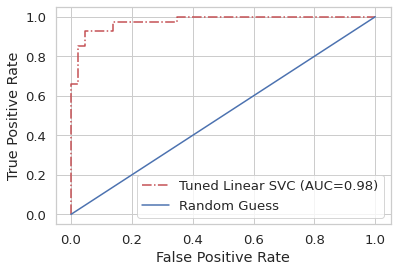

In [299]:
fpr, tpr, thresholds = roc_curve(Y_test_onehot, list(best_cvmodel.predict_proba(X_test)[:,1]), drop_intermediate=False)
fig, ax1 = plt.subplots(1,1)
ax1.plot(fpr, tpr, 'r-.', label = 'Tuned Linear SVC (AUC=%2.2f)' % auc(fpr, tpr))
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.plot(fpr, fpr, 'b-', label = 'Random Guess')
ax1.legend();
fig.show()

In [300]:
print(f"Average Accuracy:\n")
print(f"=================\n")
print(f"Score on Training Set {100*best_cvmodel.score(X_train, Y_train)}")
print(f"Score on Test Set {100*best_cvmodel.score(X_test, Y_test)}")
print()
print(f"AUC for the Support Vector Classifier with Sigmoid Kernel: {auc(fpr,tpr)}\n")

Average Accuracy:


Score on Training Set 92.7710843373494
Score on Test Set 94.04761904761905

AUC for the Support Vector Classifier with Sigmoid Kernel: 0.9767441860465116



In [301]:
print("Grid scores on development set:")
print()
means = grid.cv_results_['mean_test_AUC']
stds = grid.cv_results_['std_test_AUC']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

Grid scores on development set:

0.941 (+/-0.057) for {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}
0.938 (+/-0.064) for {'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}
0.942 (+/-0.058) for {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
0.938 (+/-0.064) for {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}
0.943 (+/-0.058) for {'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}
0.938 (+/-0.064) for {'C': 0.001, 'gamma': 0.1, 'kernel': 'linear'}
0.956 (+/-0.087) for {'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}
0.938 (+/-0.064) for {'C': 0.001, 'gamma': 10, 'kernel': 'linear'}
0.941 (+/-0.057) for {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
0.949 (+/-0.046) for {'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}
0.940 (+/-0.062) for {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}
0.949 (+/-0.046) for {'C': 0.01, 'gamma': 0.01, 'kernel': 'linear'}
0.943 (+/-0.058) for {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
0.949 (+/-0.046) for {'C': 0.01, 'gamma': 0.1, 'kernel': 'linear'}
0.956 (+/-0.085) for {'C': 0.01,

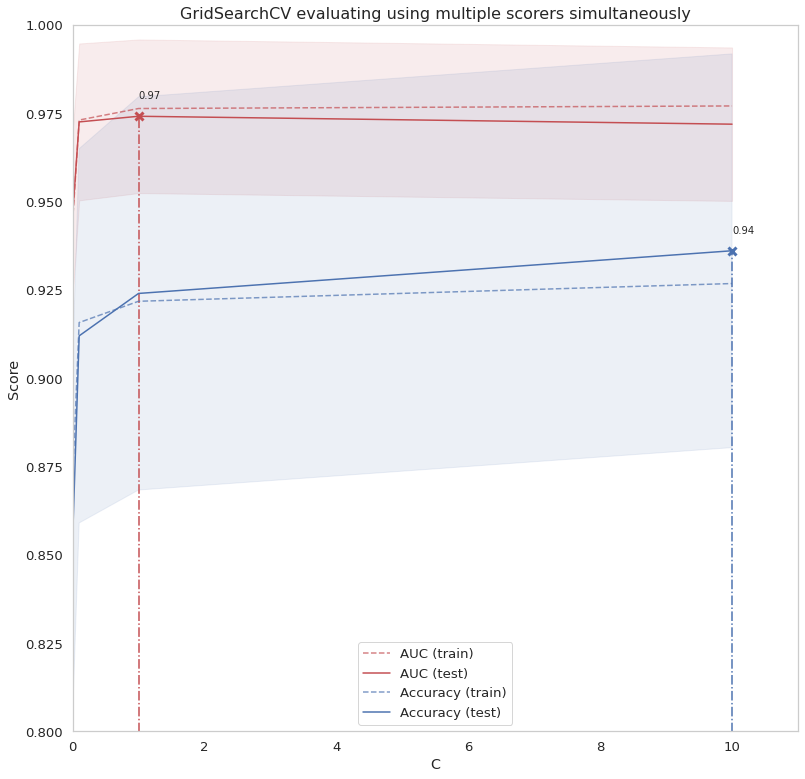

In [302]:
plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",
          fontsize=16)

plt.xlabel("C")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0, 11)
ax.set_ylim(0.8, 1)

# Dropping kernel and C parameter and retaining Gamma For Ease of the Visualizations
param_grid_ = [{'C': [0.001, 0.01, 0.1, 1, 10]}]
simplified_gs = GridSearchCV(SVC(random_state=seed, kernel=grid.best_params_['kernel'], gamma=grid.best_params_['gamma']),
                  param_grid=param_grid_,
                  scoring=scoring_, refit='AUC', return_train_score=True)

simplified_gs.fit(X_train, Y_train.values.ravel())
results = simplified_gs.cv_results_
# Get the regular numpy array
#  from the MaskedArray
import numpy as np
X_axis = np.array(results['param_C'].data, dtype=float)

for scorer, color in zip(sorted(scoring_), ['r', 'b']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()

### 3.6 Model Performance: The Confusion Matrix for The Best Estimator




[[0.93181818 0.05      ]
 [0.06818182 0.95      ]]


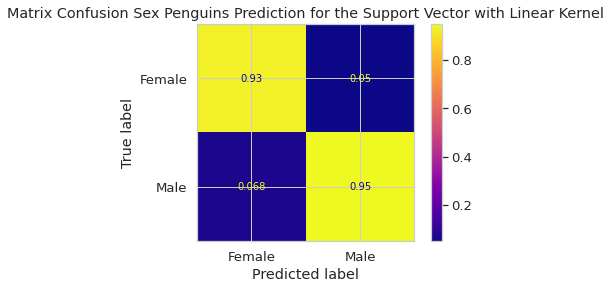

In [303]:
# Let's plot the confusion matrix
# y_pred = best_cvmodel.predict(X_test)
# mat = confusion_matrix(Y_test, y_pred)
# plt.subplots(figsize=(12,8))
# sns.heatmap(mat.T, square=True, cmap='YlGnBu',annot=True, cbar=False)
# plt.xlabel('true label')
# plt.ylabel('predicted label')
# plt.show()

#Goodness-of-fit Metrics
y_pred = best_cvmodel.predict(X_test)
disp = plot_confusion_matrix(best_cvmodel, X_test, Y_test,
                                 display_labels=np.unique(Y_test),
                                 cmap='plasma',
                                 normalize='pred')
disp.ax_.set_title("Matrix Confusion Sex Penguins Prediction for the Support Vector with Linear Kernel")
print(disp.confusion_matrix)

### **Bonus Track**: Features Sensitivity

Here we compare the benefits of including all the features on the fitting of the chosen model above.

As can be seen, these benefits are marginal and serves as a quality check of the features extraction explained above.

In [304]:
# Resetting Features
X = dataset.iloc[:, :-1]
X_dummies = pd.get_dummies(X)

In [305]:
# Splitting. Now all the Features Categorical and Numerical are taken into account
X_train, X_test, Y_train, Y_test = train_test_split(X_dummies, Y, random_state=seed, test_size= 0.25)
X_train = rbsc.fit_transform(X_train)
X_test = rbsc.transform(X_test)

svcallin = SVC(kernel = 'linear', 
          random_state = seed, 
          probability=True)

svcallin.fit(X_train,Y_train.values.ravel())
scallin = svcallin.score(X_test,Y_test.values.ravel())

In [306]:
print(scallin)

0.8928571428571429


In [307]:
scallin_training = svcallin.score(X_train,Y_train.values.ravel())

In [308]:
print(scallin_training)

0.927710843373494


In [309]:
parameters_grid = [{'kernel': ['rbf','linear'], 'gamma': [0.001, 0.01, 0.1, 10],
                     'C': [0.001, 0.01, 0.1, 1, 10]}]
scoring_ = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
grid = GridSearchCV(SVC(probability=True, random_state=seed), 
                    parameters_grid, 
                    scoring = scoring_, 
                    refit='AUC', 
                    return_train_score=True)
grid.fit(X_train, Y_train.values.ravel())
print("Best parameters set found on development set:")
print()
print(grid.best_params_)

Best parameters set found on development set:

{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}


#### Train-Test Drop of The Scores


When all the features describing penguins features are considered for the fitting of the Support Vector Machine with _sigmoid_ kernel, the drop of the Score is more accused indicating more risk of _overfitting_:

In [317]:
print(f"All-In Tuned Linear SVC Score on Training Set: {100*modelallin.score(X_train, Y_train.values.ravel())}%")
print(f"All-In Tuned Linear SVC Score on Testing Set: {100*modelallin.score(X_test, Y_test.values.ravel())}%")

All-In Tuned Linear SVC Score on Training Set: 92.7710843373494%
All-In Tuned Linear SVC Score on Testing Set: 89.28571428571429%


Moreover, in terms of the ROC and the related Area Under the Curve (AUC) we also see not improvements as compared with the reduced model:


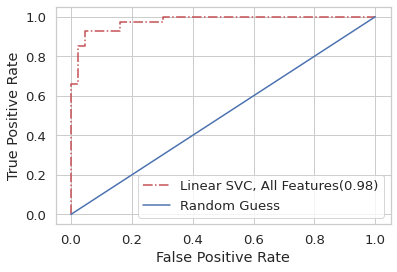

In [318]:
fpr, tpr, thresholds = roc_curve(Y_test_onehot, list(modelallin.predict_proba(X_test)[:,1]), drop_intermediate=False)
# df_roc = pd.DataFrame({'fpr':fpr, 'tpr':tpr, 'threshold':thresholds})
# fig = px.line(df_roc, x='fpr', y='tpr', hover_data=['threshold'])
# fig.show()
fig, ax1 = plt.subplots(1,1)
ax1.plot(fpr, tpr, 'r-.', label = 'Linear SVC, All Features(%2.2f)' % auc(fpr, tpr))
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.plot(fpr, fpr, 'b-', label = 'Random Guess')
ax1.legend();
fig.show()

Finally, with regard to the Confusion Matrix, a tuned SVC with Linear Kernel with all the features taken into consideration classifies worse than the reduced model.

[[0.925      0.13636364]
 [0.075      0.86363636]]


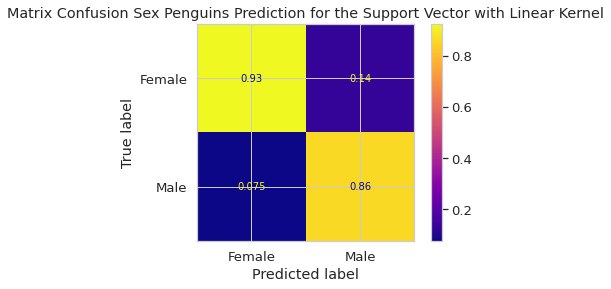

In [316]:
#Goodness-of-fit Metrics
y_pred = modelallin.predict(X_test)
disp = plot_confusion_matrix(modelallin, X_test, Y_test,
                                 display_labels=np.unique(Y_test),
                                 cmap='plasma',
                                 normalize='pred')
disp.ax_.set_title("Matrix Confusion Sex Penguins Prediction for the Support Vector with Linear Kernel")
print(disp.confusion_matrix)

## 4 Summary and Conclusions

We have tested two models for the sex classification of the penguins dataset. 

After preprocessing the data and using a cross-validated features extraction strategy we have dropped out all the explanatory variables except the `body_mass_g`, the `bill_depth_mm`, the `bill_length_mm` and the dummy variable `species_Adelie`.

To extract these four features we use as base model the _Logistic Regression_ with all numeric and categorical variables (one-hot encoded) taken into consideration.

By means of the method `RFECV` from `sklearn`, we implement a Recursive Features Elimination with 5 Stratified (well balanced) K-Folds and we found that 4 features are enough for maximizing the score.

Then we compare several metrics of the Logistic Regression compared with a Support Vector Machine (SVM) with linear kernel when the reduced number of features is taken into consideration. 

After that, we choose the SVM for the _Hyperparameters Tuning_ as we found that the behaviour in terms of some metrics is slightly better than the Logistic Regression.

With the _Hyperparameters Tuned_ we rerun the metrics and we also represent the behaviour of the _accuracy_ and the _Area Under the ROC Curve (AUC)_ against the relevant parameter. From the graphs, we conclude that further improvement of the _accuracy_ on the Test Set can be made with `C=10` with a negligible downturn of the AUC.

Finally we check what are the results when retaining all the features for the fitting SMV model and we definitely find that the strategy of feature extraction is well supported by the empirical evidence.

### The Logistic Regression

The Logistic Regression Classifier is equivalent in some sense to the One-Layer Perceptron with a Sigmoid Activating Function for the Output, according to the followin scheme:


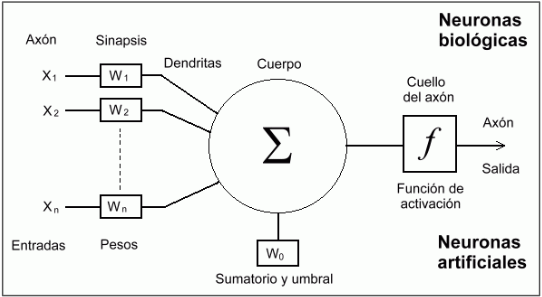

The relevant features are linearly weighted first:

$$
z = w_0 + \sum_i^n w_i X_i
$$

and after that, the transformed by the sigmoid $f$ is computed, in such a way that it can be considered as the probability of being an individual of the first class

$$
\hat{P}(y=\rm{F}|\textbf{X}) = \sigma(z)=\frac{1}{1+exp(-z)}
$$

Roughly speaking, if the probability is high, the Penguin is classified as a Female (F) (the first class of this binary classification problem) or as a Male on the contrary. The algorithm of fitting takes into consideration some relevant loss function to minimize and, doing so, estimates the $w$s which can be controlled by a term of regularization in order to avoid overfitting.





### Support Vector Machines

The most simple SVMs are based on the idea of the Separating Hyperplane. 

As we seen on the discussion of the features extraction above, starting from two features (with an optimal number of four features into consideration) we can achieve good results in terms of accuracy. 

For instance, if we consider just the `body_mass_g`and the `bill_depth_mm` and rescue some visuals we have:

In [13]:
fig = px.scatter(dataset, x="bill_depth_mm", y="body_mass_g" , color="sex")
fig.show()

From the graph above we see that blue and red points are close to be linearly separable as shown in the following schematic representation:

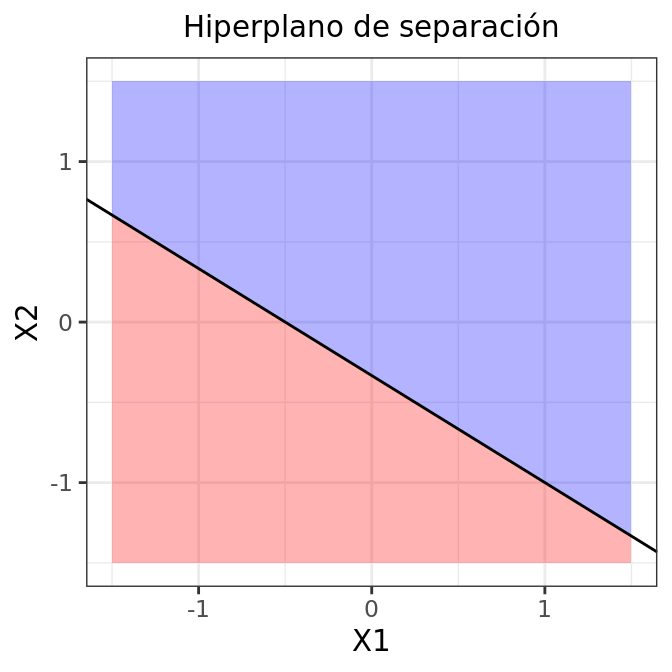

In two dimensions, the Separating Hyperplane is in fact the black line with equation:
$$
w_0 + w_1x_1 + w_2 x_2 = 0.
$$

Male penguins (the blue dots) roughly satisfy that inequality
$$
w_0 + w_1x_1 + w_2 x_2 > 0,
$$
whereas Female penguins the opposite
$$
w_0 + w_1x_1 + w_2 x_2 < 0.
$$

Thus, if the sets were perfectly separable, then equipped with this Separating Hyperplane and generalizing with more features into consideration:
$$
w_0 + w_1 x_1 + w_2 x_2 + ... + w_p x_p < 0, \ si \ y_i=0,~\rm{(Female)}
$$

$$
w_0 + w_1x_1 + w_2x_2 + ... + w_px_p > 0, \ si \ y_i=1,~\rm{(Male)}
$$

we can solve a binary classification problem. SVM algorith with kernel linear (if sets are perfectly separable) searches for the _maximal margin hyperplane_: i.e. the one with more distance to the closest points of each class.

However in this case, a real classification problem, the Separating Hyperplane does not exist and then we have to relax the concept of _maximal margin hyperplane_ in order to allow some percentage of classification errors for the separating frontier.

In fact, this proportion of missclassifications is controlled by the hyperparameter $C$ and with $C<\infty$ we are dealing with a _soft margin classifier_. This kind of SVC allows to not perfectly separate the space of features considered. 

For this reason this is the hyperparameter we have tuned in order to improve the classifier performance.

Other approaches to overcome the problem when sets are not linear separable consist on introducing several transformations (the kernels) in the original set in order to achieve (after these transformations) a more suitable representation for soft-margin classification.

Here we test the _Gaussian Radial Basis Functions_ based tranformation against the _Linear_, but no further improvements are found, even with the tuning of the extra relevant hyperparameter $\gamma$ for these kind of non-linear kernels.

